In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU, SimpleRNN, Conv1D, TimeDistributed, MaxPooling1D, Flatten, Dropout
from keras import optimizers,metrics
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [63]:
from IPython.display import clear_output

In [64]:
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv("../augmented-ecom-churn-data.csv", index_col="visitorid")

In [132]:
df.head()

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,2.0,2.000000,3.807887,98.0,4.000000,0.121951,4423.9023,0.024390,2.487805,5.853659,1.062096,15.292683,4.290943,0.390244,7.451220,1.862805,0
72373,1,13.0,8.000000,0.000000,21.0,3.500000,0.500000,9300.0000,0.500000,1.500000,7.500000,0.707107,18.500000,2.121320,0.500000,17.175000,4.907143,0
150651,2,8.0,9.444445,11.596083,97.0,5.700000,0.800000,14976.0000,0.100000,3.300000,5.900000,1.100505,19.900000,1.523884,0.200000,7.818333,1.371638,0
500130,3,12.0,6.000000,6.164414,36.0,5.600000,0.800000,17160.0000,0.200000,4.400000,7.400000,0.547723,12.400000,8.848729,0.600000,3.943333,0.704167,0
543762,4,1.0,1.250000,2.046338,15.0,3.888889,0.222222,17733.3340,0.111111,2.000000,8.000000,0.000000,17.888890,3.179797,0.333333,8.664815,2.228095,0


In [67]:
df.shape

(108810, 18)

In [68]:
df.columns

Index(['Unnamed: 0', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'user_rec',
       'int_n_r', 'tran_n_r', 'rev_sum_r', 'major_spend_r', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int', 'target_class'],
      dtype='object')

In [69]:
df.head()

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,2.0,2.000000,3.807887,98.0,4.000000,0.121951,4423.9023,0.024390,2.487805,5.853659,1.062096,15.292683,4.290943,0.390244,7.451220,1.862805,0
72373,1,13.0,8.000000,0.000000,21.0,3.500000,0.500000,9300.0000,0.500000,1.500000,7.500000,0.707107,18.500000,2.121320,0.500000,17.175000,4.907143,0
150651,2,8.0,9.444445,11.596083,97.0,5.700000,0.800000,14976.0000,0.100000,3.300000,5.900000,1.100505,19.900000,1.523884,0.200000,7.818333,1.371638,0
500130,3,12.0,6.000000,6.164414,36.0,5.600000,0.800000,17160.0000,0.200000,4.400000,7.400000,0.547723,12.400000,8.848729,0.600000,3.943333,0.704167,0
543762,4,1.0,1.250000,2.046338,15.0,3.888889,0.222222,17733.3340,0.111111,2.000000,8.000000,0.000000,17.888890,3.179797,0.333333,8.664815,2.228095,0


In [133]:
from sklearn import preprocessing

cols = ['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'user_rec',
       'int_n_r', 'tran_n_r','rev_sum_r', 'major_spend_r', 'int_itm_n_avg',
       'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r',
       'ses_len_avg', 'time_to_int']


min_max_scaler = preprocessing.MinMaxScaler()
df[cols] = min_max_scaler.fit_transform(df[cols])

In [134]:
df

,Unnamed: 0,ses_rec,ses_rec_avg,ses_rec_sd,user_rec,int_n_r,tran_n_r,rev_sum_r,major_spend_r,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,target_class
visitorid,,,,,,,,,,,,,,,,,,
64931,0,0.054054,0.016338,0.069367,0.867257,0.067658,0.024390,0.002787,0.024390,0.044245,0.267661,0.360921,0.609747,0.198924,0.337223,0.094121,0.214939,0
72373,1,0.351351,0.065353,0.000000,0.185841,0.059182,0.100000,0.005858,0.500000,0.026603,0.803928,0.240289,0.737629,0.098342,0.432067,0.216947,0.566209,0
150651,2,0.216216,0.077153,0.211242,0.858407,0.096476,0.160000,0.009434,0.100000,0.058751,0.282756,0.373973,0.793450,0.070646,0.172827,0.098758,0.158266,0
500130,3,0.324324,0.049015,0.112295,0.318584,0.094781,0.160000,0.010810,0.200000,0.078398,0.771355,0.186127,0.494411,0.410218,0.518481,0.049811,0.081250,0
543762,4,0.027027,0.010211,0.037277,0.132743,0.065774,0.044444,0.011171,0.111111,0.035533,0.966794,0.000000,0.713263,0.147412,0.288045,0.109450,0.257088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406824,108805,0.378378,0.596350,0.000000,0.769912,0.016803,0.000000,0.000000,0.000000,0.017672,0.478196,0.720866,0.418654,0.098342,0.000000,0.000000,0.000000,1
1406906,108806,0.513514,0.106199,0.000000,0.283186,0.033755,0.000000,0.000000,0.000000,0.026603,0.641062,0.000000,0.478462,0.262246,0.000000,0.050737,0.231731,1
1406914,108807,0.567568,0.005446,0.017175,0.203540,0.059182,0.000000,0.000000,0.000000,0.053393,0.641062,0.000000,0.528302,0.121922,0.648101,0.080368,0.209753,1


In [72]:
thresh = int(len(df) * .8)

train_x, train_y = df[cols].iloc[:thresh].to_numpy(), df["target_class"].iloc[:thresh].to_numpy()


val_x, val_y = df[cols].iloc[thresh:].to_numpy(), df["target_class"].iloc[thresh:].to_numpy()

In [113]:
list(df.columns)

['Unnamed: 0',
 'ses_rec',
 'ses_rec_avg',
 'ses_rec_sd',
 'user_rec',
 'int_n_r',
 'tran_n_r',
 'rev_sum_r',
 'major_spend_r',
 'int_itm_n_avg',
 'ses_mo_avg',
 'ses_mo_sd',
 'ses_ho_avg',
 'ses_ho_sd',
 'ses_wknd_r',
 'ses_len_avg',
 'time_to_int',
 'target_class']

In [74]:
train_x = train_x.reshape((-1, 16, 1))

val_x = val_x.reshape((-1, 16, 1))

In [75]:
def init_model():
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=2, activation='relu', padding='same', input_shape=(16, 1)))

    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(70))
    model.add(Dense(1, activation='sigmoid'))

    adam = optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=[metrics.Precision(),'accuracy'])
    return model

model = init_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 16, 8)             24        
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 8, 8)              0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 70)                22120     
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 22215 (86.78 KB)
Trainable params: 22215 (86.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


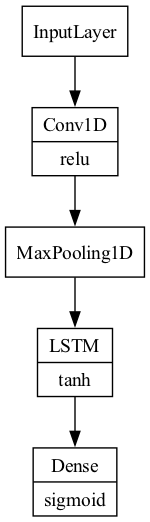

In [107]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=True,
    show_trainable=False,
)

In [77]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

/var/folders/3h/p1ryrhcs5gb6mc922xgnfkmr0000gn/T/ipykernel_85173/2175184423.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


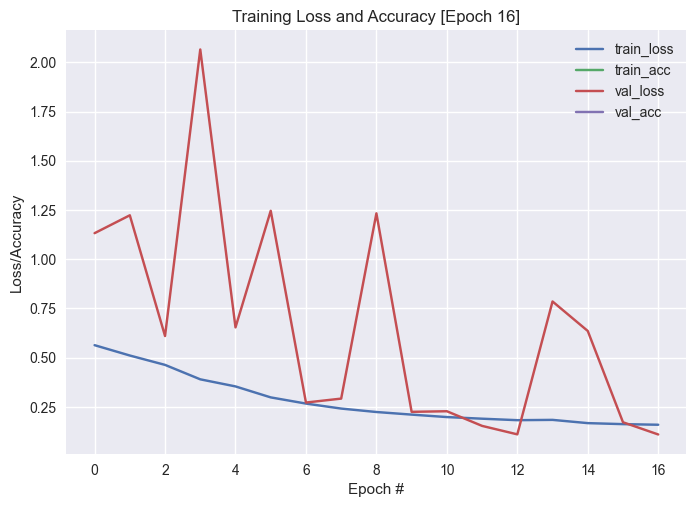

171/171 [==============================] - 3s 18ms/step - loss: 0.1596 - precision_3: 0.8610 - accuracy: 0.9335 - val_loss: 0.1102 - val_precision_3: 1.0000 - val_accuracy: 0.9728


In [78]:
history = model.fit(train_x, train_y, epochs = 17, validation_data = (val_x, val_y),
                    batch_size = 512, callbacks=[plot_losses])

In [97]:
list(history.history)

['loss',
 'precision_3',
 'accuracy',
 'val_loss',
 'val_precision_3',
 'val_accuracy']

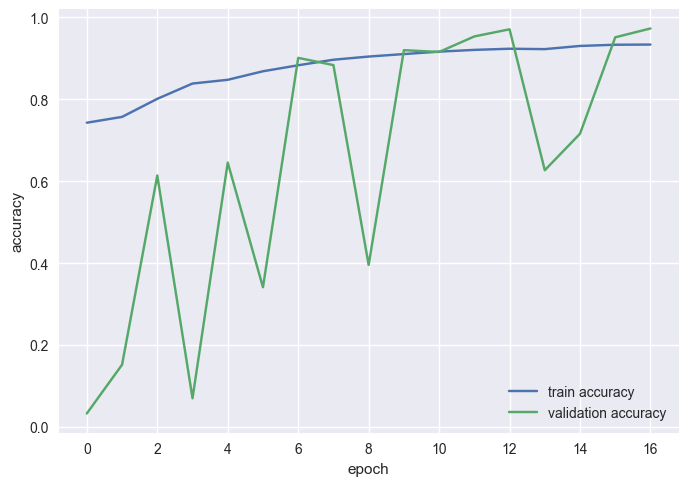

In [106]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [79]:
acc = model.evaluate(val_x,val_y)

681/681 [==============================] - 1s 1ms/step - loss: 0.1102 - precision_3: 1.0000 - accuracy: 0.9728


In [110]:
acc

[0.11019407212734222, 1.0, 0.972796618938446]